In [238]:
from pathlib import Path
import json
import pandas as pd
import nltk
import re
import io
from nltk.corpus import stopwords, reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.feature_extraction.text import CountVectorizer
import hvplot.pandas as hv
import plotly.express as px
import plotly.graph_objects as go
lemmatizer = WordNetLemmatizer()

path = Path('Nanosafety_2010_2020.csv')

scopus = pd.read_csv(path)


for row in scopus:
    big_string_title = ''.join(str(scopus['Title']))
    big_string_content = ''.join(str(scopus['Content']))
sw = set(stopwords.words('english'))
regex = re.compile("[^a-zA-Z ]")
wordlist = re.sub("[^\w]", " ", 'ha').split()
sw_addons = {'of', 'and', 'for', 'in', 'a', 'the', 'one', 'by', 'inf', 'with', 'an', 'using', 'via', 'based', 'nan', 'date', 'used', 'b', 'tio', 'nanote'}
sw_addons.update(wordlist)
re_clean_title = regex.sub('', big_string_title)
re_clean_content = regex.sub('', big_string_content)
words_title = word_tokenize(re_clean_title)
words_content = word_tokenize(re_clean_content)
lem_title = [lemmatizer.lemmatize(word) for word in words_title]
lem_content = [lemmatizer.lemmatize(word) for word in words_content]
output_title = [word.lower() for word in lem_title if word.lower() not in sw.union(sw_addons)]
output_content = [word.lower() for word in lem_content if word.lower() not in sw.union(sw_addons)]
full_string_title = ' '.join(output_title)
full_string_content = ' '.join(output_content)

Type:        Pattern
String form: re.compile('[^a-zA-Z ]')
File:        c:\users\gss8640\anaconda3\envs\dlenv\lib\re.py
Docstring:   Compiled regular expression object.


In [294]:
scopus['Date'] = pd.DatetimeIndex(scopus['Date'])
sw = set(stopwords.words('english'))
regex = re.compile("[^a-zA-Z ]")
wordlist = re.sub("[^\w]", " ", 'ha').split()
sw_addons = {'of', 'and', 'for', 'in', 'a', 'the', 'one', 'by', 'inf', 'with', 'an', 'using', 'via', 'based', 'nan', 'date', 'used', 'b', 'tio', 'nanote'}
sw_addons.update(wordlist)
for i in range(len(scopus)): 
    # Remove all the special characters
    scopus_title_clean = re.sub(r'[?|$|.|!]', r' ', str(scopus.iloc[i].Title))
    scopus_content_clean = re.sub(r'[?|$|.|!]', r' ', str(scopus.iloc[i].Content))
    # Remove non-alphabet characters
    scopus_title_clean = re.sub(r'[^a-z A-Z]',r' ', scopus_title_clean)  
    scopus_content_clean = re.sub(r'[^a-z A-Z]',r' ', scopus_content_clean)
    # Convert the whole text to lowercase
    scopus_title_clean = scopus_title_clean.lower()
    scopus_content_clean = scopus_content_clean.lower()
    # Delete any word which is less than 3-characters mostly those are stopwords
    scopus_title_clean = re.sub(r'\b\w{1,3}\b', ' ', scopus_title_clean)
    scopus_content_clean = re.sub(r'\b\w{1,3}\b', ' ', scopus_content_clean)
    # Strip extra spaces in the text
    scopus_title_clean = re.sub(r' +', ' ', scopus_title_clean)
    scopus_content_clean = re.sub(r' +', ' ', scopus_content_clean)
    # Replace row with cleaned string
    scopus.Title = scopus.Title.replace(scopus.iloc[i].Title, scopus_title_clean)
    scopus.Content = scopus.Content.replace(scopus.iloc[i].Content, scopus_content_clean)
scopus

,Date,Title,Content
0,2020-12-30,relationship between chemical composition phys...,background aims decades after introduction nan...
1,2020-12-30,self protecting biomimetic nanozyme selective ...,clearance peripheral amyloid been demonstrated...
2,2020-12-30,phage capsid nanoparticles multivalent inhibit...,
3,2020-12-22,bacterial outer membrane vesicles presenting p...,natural extracellular membrane vesicles secret...
4,2020-12-22,bright aggregation induced emission nanopartic...,photodynamic therapy noninvasive therapeutic s...
5,2020-12-21,combinatorial mirna replenishment irinotecan d...,synergistic combination microrna mirna modula...
6,2020-12-21,doped bayf upconversion nanoparticles with en...,this work bayf abbreviated bayf where upconve...
7,2020-12-21,activating antibacterial effect diamino pyrimi...,adequately decorated gold nanoparticles gnps h...
8,2020-12-18,perspective lung particles fibers nanomaterial...,studies have shown that wide range factors inc...
9,2020-12-15,supernucleation crystalline structure thermal ...,naturally occurring thymine incorporated into ...


In [298]:
# Group by year for Title and Content
grouped_title = scopus[['Date','Title']].groupby(pd.Grouper(key='Date', axis = 0,
                      freq='Y')).agg(lambda col: ' '.join(col))
grouped_title = grouped_title.reset_index()

grouped_content = scopus[['Date','Content']].groupby(pd.Grouper(key='Date', axis = 0,
                      freq='Y')).agg(lambda col: ' '.join(col))
grouped_content = grouped_content.reset_index()

# grouped_title
grouped_content

,Date,Content
0,2010-12-31,organo montmorillonite cloisite modified with...
1,2011-12-31,substances used prepare coatings food pharmace...
2,2012-12-31,research policies united states european union...
3,2013-12-31,begin this chapter nanosafety animals cell cu...
4,2014-12-31,brain nervous system disorders represent large...
5,2015-12-31,nanotechnology being presented third industria...
6,2016-12-31,apoptosis critical role both physiological p...
7,2017-12-31,emerging crispr system represents promising p...
8,2018-12-31,selective targeting plus optimal biocompatibil...
9,2019-12-31,systematic agrochemicals generated numerous d...


In [299]:
# create a list of years
grouped_title = grouped_title.reset_index()
grouped_title.Title = grouped_title.Title.astype(str)
years = grouped_title.Date.unique()

years_df = pd.DataFrame(years)
years_df.columns = ['Date']
years_df

corpus = [''.join(str(grouped_title[(grouped_title.Date == year)].Title.tolist())) for year in years]
cv=CountVectorizer(ngram_range=(1, 1), stop_words = sw.union(sw_addons), min_df = 3)
X = cv.fit_transform(corpus)
X = X.toarray()

bow=pd.DataFrame(X, columns = cv.get_feature_names())
main_df = pd.merge(years_df, bow, right_index=True, left_index=True)
main_df = main_df.set_index('Date')
main_df



,ability,ablation,abrasion,absence,absorbing,absorption,academic,accelerated,accumulation,accurate,...,workplaces,workshop,world,wound,wrapped,yeast,zebrafish,zeta,zinc,zwitterionic
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,3,0,3,0
2011-12-31,1,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2012-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2013-12-31,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2014-12-31,0,2,2,0,0,1,0,0,4,2,...,0,0,0,0,1,1,0,0,4,1
2015-12-31,2,1,2,2,0,3,1,3,4,1,...,2,3,2,2,0,0,2,1,4,0
2016-12-31,0,3,2,1,2,1,0,1,2,0,...,1,0,0,3,1,2,2,1,3,3
2017-12-31,0,3,1,0,0,3,0,1,2,1,...,2,0,3,2,0,1,1,1,0,0
2018-12-31,1,1,0,0,1,0,1,1,0,0,...,0,1,0,5,0,0,4,0,2,0


In [306]:
text=main_df.iloc[7].sort_values(ascending=False)
text_top = text[:10]
title_df = pd.DataFrame.from_dict({main_df.index[7]: text_top})

title_df

,2017-12-31 00:00:00
nanoparticles,142
nanomaterials,75
assessment,40
cells,39
therapy,39
tumor,31
cancer,31
gold,31
oxide,31
toxicity,31


In [301]:
big_dict = {}
for n in range(len(main_df)): 
    text= main_df.iloc[n].sort_values(ascending=False)
    text_top = text[:10]
    text_top_dict=text_top.sort_values(ascending=False).to_dict()
    big_dict.update({main_df.index[n]: text_top_dict})
    
wordcloud = WordCloud(min_word_length =3, background_color='white')

#freqwordcloud.generate_from_frequencies(text2_dict)

big_dict_df = pd.DataFrame(big_dict)
big_dict_df = big_dict_df.T
big_dict_df

,assessment,cancer,carbon,cell,cells,delivery,drug,effects,exposure,gold,...,nanoparticles,nanotechnology,nanotubes,oxide,poly,safety,surface,therapy,toxicity,tumor
2010-12-31,NaN,NaN,NaN,NaN,5.0,8.0,NaN,NaN,NaN,5.0,...,19.0,5.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,5.0
2011-12-31,NaN,NaN,12.0,NaN,7.0,10.0,8.0,NaN,NaN,11.0,...,40.0,NaN,11.0,NaN,9.0,NaN,8.0,NaN,NaN,NaN
2012-12-31,NaN,12.0,11.0,10.0,18.0,NaN,NaN,17.0,NaN,17.0,...,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-31,NaN,18.0,32.0,20.0,24.0,21.0,NaN,NaN,NaN,NaN,...,60.0,NaN,22.0,NaN,NaN,17.0,NaN,NaN,17.0,NaN
2014-12-31,NaN,28.0,28.0,NaN,21.0,25.0,22.0,NaN,23.0,26.0,...,85.0,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,NaN,37.0,46.0,NaN,35.0,26.0,28.0,26.0,NaN,25.0,...,115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN
2016-12-31,NaN,44.0,43.0,NaN,31.0,30.0,30.0,NaN,NaN,NaN,...,115.0,NaN,NaN,29.0,NaN,NaN,NaN,33.0,NaN,NaN
2017-12-31,40.0,31.0,NaN,NaN,39.0,NaN,NaN,NaN,NaN,31.0,...,142.0,NaN,NaN,31.0,NaN,NaN,NaN,39.0,31.0,31.0
2018-12-31,34.0,46.0,NaN,29.0,NaN,NaN,NaN,32.0,NaN,NaN,...,128.0,NaN,NaN,39.0,NaN,NaN,NaN,37.0,NaN,42.0
2019-12-31,NaN,61.0,NaN,32.0,35.0,32.0,32.0,NaN,NaN,NaN,...,125.0,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,49.0


Init signature:
WordCloud(
    font_path=None,
    width=400,
    height=200,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1,
    color_func=None,
    max_words=200,
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='black',
    max_font_size=None,
    font_step=1,
    mode='RGB',
    relative_scaling='auto',
    regexp=None,
    collocations=True,
    colormap=None,
    normalize_plurals=True,
    contour_width=0,
    contour_color='black',
    repeat=False,
    include_numbers=False,
    min_word_length=0,
    collocation_threshold=30,
)
Docstring:     
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=2

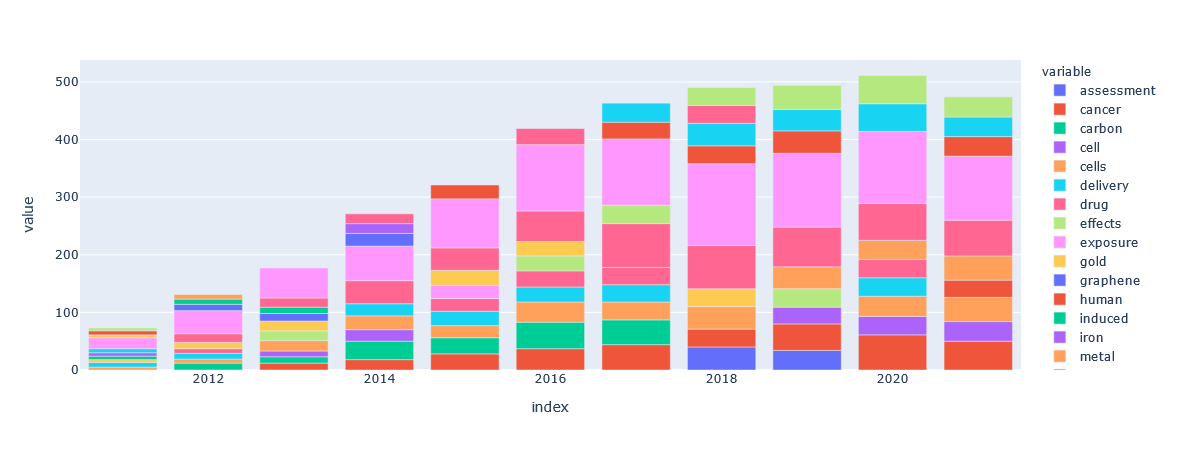

In [307]:
fig = px.bar(big_dict_df)
fig.show()

In [26]:
?main_df.sort_values

Signature:
main_df.sort_values(
    by,
    axis=0,
    ascending=True,
    inplace=False,
    kind='quicksort',
    na_position='last',
    ignore_index=False,
    key: Union[Callable[[ForwardRef('Series')], Union[ForwardRef('Series'), ~AnyArrayLike]], NoneType] = None,
)
Docstring:
Sort by the values along either axis.

Parameters
----------
        by : str or list of str
            Name or list of names to sort by.

            - if `axis` is 0 or `'index'` then `by` may contain index
              levels and/or column labels.
            - if `axis` is 1 or `'columns'` then `by` may contain column
              levels and/or index labels.

            .. versionchanged:: 0.23.0

               Allow specifying index or column level names.
axis : {0 or 'index', 1 or 'columns'}, default 0
     Axis to be sorted.
ascending : bool or list of bool, default True
     Sort ascending vs. descending. Specify list for multiple sort
     orders.  If this is a list of bools, must match the l

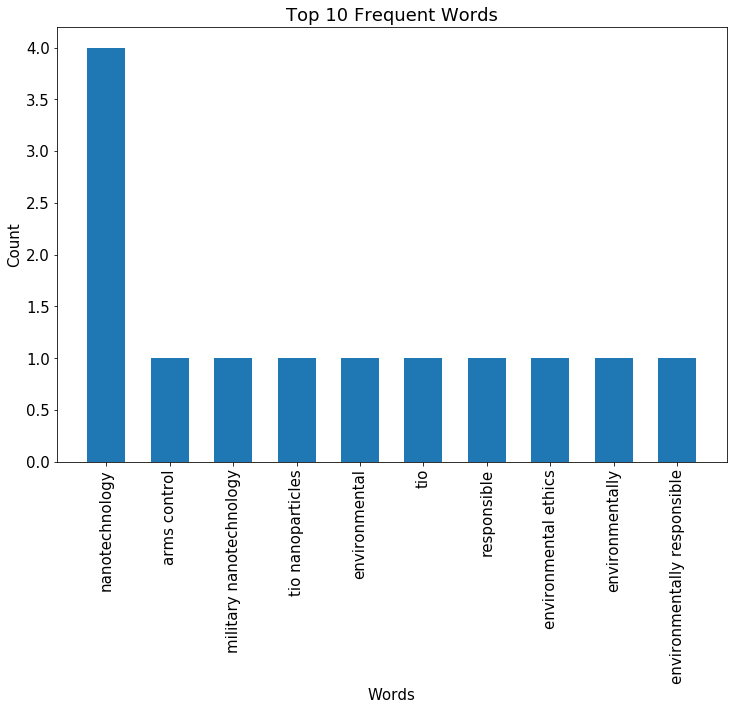

In [82]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', size=15) 
bar = plt.bar(*zip(*text_top20.items()), width = .6, orientation = 'vertical')
plt.xticks(rotation = 90)
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("Top 10 Frequent Words")
plt.show()

In [ ]:
rel_freq=wordcloud.words_
print(list(word_freq.items())[:10])
print(list(rel_freq.items())[:10])

In [ ]:
df = pd.DataFrame.from_dict(text2_dict.items())
df.columns = ['Word', 'Count']

In [ ]:
fig = px.bar(df, x='Word', y='Count')
fig.show()